## Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os
from pathlib import Path
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


In [105]:
df = pd.read_csv("C:\\Users\\ierem\\Downloads\\gsearch_jobs.csv",encoding='utf8')

In [106]:
df.shape

(14346, 27)

## Checking the null values and duplicates

In [107]:
df.isna().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  14
via                        0
description                0
extensions                 0
job_id                     0
thumbnail               6422
posted_at                  0
schedule_type             86
work_from_home          7830
salary                 11611
search_term                0
date_time                  0
search_location            0
commute_time           14346
salary_pay             11611
salary_rate            11611
salary_avg             11611
salary_min             11765
salary_max             11765
salary_hourly          12833
salary_yearly          13130
salary_standardized    11611
description_tokens         0
dtype: int64

In [108]:
df.duplicated().sum()

0

## Cleaning unnecessary columns and organizing data

In [109]:
df['via'] = df['via'].str.replace('via ', '')

In [110]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [111]:
df.drop(columns=["Unnamed: 0","commute_time"], inplace=True) 

In [112]:
df.dtypes

index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

## Creating columns for job title, seniority and schedule type

In [113]:
def title_key(title):
    if 'data analyst' in title.lower() or 'data analysis' in title.lower() or 'analyze' in title.lower() or 'data & bi' in title.lower():
        return 'Data Analyst'
    elif 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'Data Scientist' 
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'machine learning' in title.lower() or 'model' in title.lower() or 'algorithm' in title.lower():
        return 'MLE'
    elif 'business intel' in title.lower():
        return 'Business Intelligence Analyst'
    elif 'data warehouse' in title.lower():
        return 'Data Warehouse Engineer'
    elif 'data quality' in title.lower():
        return 'Data Quality Analyst'
    elif 'data govern' in title.lower():
        return 'Data Governance Analyst'
    elif 'data analytic' in title.lower():
        return 'Data Analytics Engineer'     
    elif 'business analyst' in title.lower():
        return 'Business Analyst'      
    elif 'data management' in title.lower():
        return 'Data Management Analyst'  
    else:
        return 'Other'

def rank(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'II' in title.lower() or 'expert' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'I' in title.lower():
        return 'Junior'
    elif 'director' in title.lower() or 'principal' in title.lower():
        return 'Director'
    elif 'entry' in title.lower():
        return 'Entry Level'
    elif 'intern' in title.lower():
        return 'Intern'
    else:
        return 'Mid-level'
    
def time(extensions):
    if 'full' in extensions.lower():
        return 'Full Time'
    elif 'part' in extensions.lower():
        return 'Part Time'
    elif 'intern' in extensions.lower():
        return 'Internship'
    elif 'contract' in extensions.lower():
        return 'Contract'    
    else:
        return 'Other'

In [114]:
df["title_key"] = df["title"].apply(title_key)
df["rank_type"] = df["title"].apply(rank)
df["job_type"] = df["extensions"].apply(time)

# backing up the data
df_backup = df 

## Seeing the total numbers of schedule types 

In [19]:
df["job_type"].value_counts()

Full Time     10719
Contract       3300
Part Time       136
Internship      105
Other            86
Name: job_type, dtype: int64

# What is the salary increase by seniority?

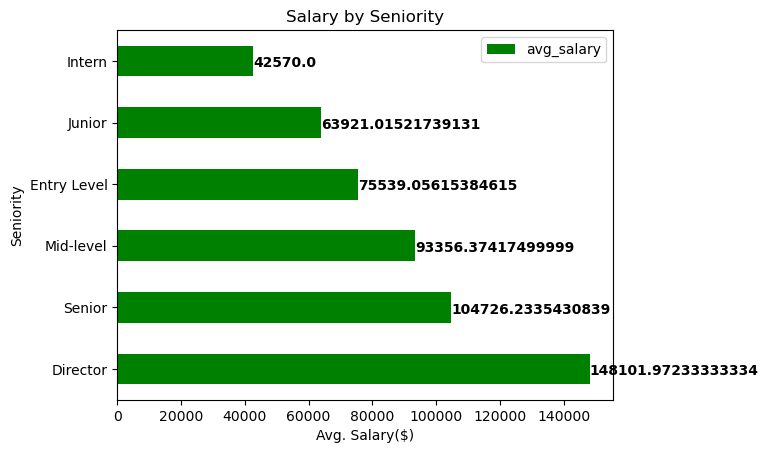

In [22]:
df_ttemp = df.groupby(["rank_type"])\
       .agg({'salary_standardized':'mean'}) \
       .reset_index() \
       .rename(columns={'salary_standardized': 'avg_salary'}) \
       .sort_values("avg_salary",ascending = False)

ax = df_ttemp.plot(kind='barh', x='rank_type', y='avg_salary', color='green')

# set the plot title and axis labels
ax.set_title('Salary by Seniority')
ax.set_xlabel('Avg. Salary($)')
ax.set_ylabel('Seniority')
df_ttemp.to_csv(r'C:\Users\ierem\Downloads\df_ttemp.csv',index = False)

for i, v in enumerate(df_ttemp['avg_salary']):
    ax.text(v + 1, i - 0.1, str(v), color='black', fontweight='bold')

plt.show()

# Total number of job posts by job titles

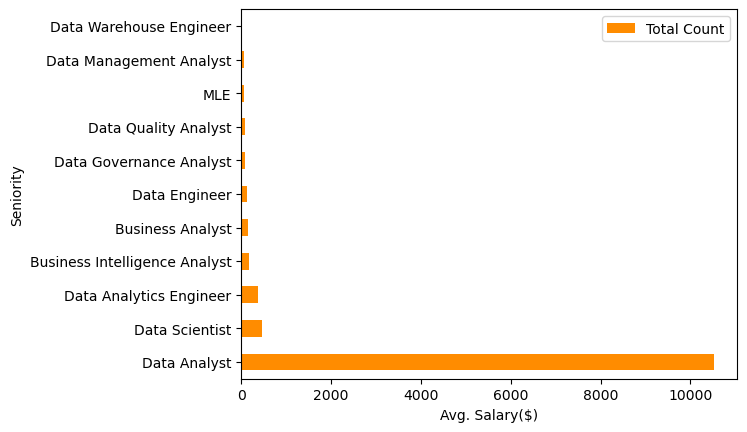

In [29]:
df_temp = df.drop(df.loc[df['title_key']=='Other'].index)
df_temp =  df_temp.groupby(["title_key"]) \
       .agg({'index':'count'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','title_key':'Title'}) \
       .sort_values("Total Count",ascending = False)

df_temp

ax = df_temp.plot(kind='barh', x='Title', y='Total Count', color='darkorange')
ax.set_xlabel('Avg. Salary($)')
ax.set_ylabel('Seniority')
plt.show()
#fig = px.bar(df_temp, x = 'Title',   y = 'Total Count' , color = "Title", title = "Job Titles")
#fig.show()

## Percentage of job posts by seniority

([<matplotlib.patches.Wedge at 0x224a3343940>,
 [Text(-0.6237770271224656, 0.9661274348833382, 'Mid-level'),
  Text(0.45209776361124754, -1.0574060772180707, 'Senior'),
  Text(2.0186748611967875, -0.5787502093063392, 'Intern'),
  Text(2.069282932589431, -0.357866099112624, 'Junior'),
  Text(2.0928473931596923, -0.17317560147053207, 'Director'),
  Text(1.1497405600898438, -0.024426307217676555, 'Entry Level')],
 [Text(-0.35256962402574143, 0.5460720284123215, '68.2%'),
  Text(0.25553351856287904, -0.5976643045145618, '26.4%'),
  Text(1.5380379894832665, -0.44095254042387755, '1.9%'),
  Text(1.5765965200681373, -0.2726598850381897, '1.5%'),
  Text(1.5945503947883368, -0.13194331540611964, '1.3%'),
  Text(0.6498533600507812, -0.013806173644773703, '0.7%')])

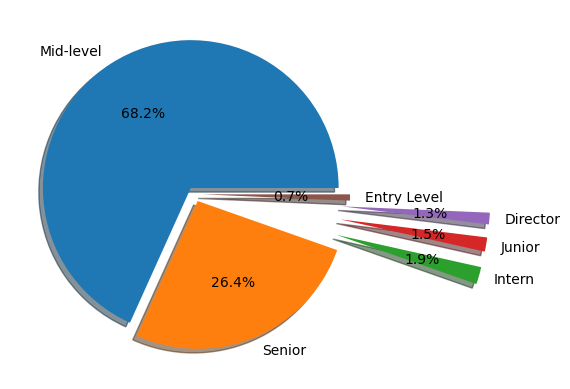

In [31]:
df=df_backup
df_temp =  df.groupby(["rank_type"]) \
       .agg({'index':'count'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','rank_type':'Seniority'}) \
       .sort_values("Total Count",ascending = False)
df_temp
explode = (0.05, 0.05,1,1,1,0.05)
#fig = px.bar(df_temp, x = 'Seniority',   y = 'Total Count' , color = "Seniority", title="Seniority Ratios")
#fig.show()
plt.pie(df_temp["Total Count"], labels = df_temp["Seniority"],autopct='%1.1f%%',explode=explode,shadow=True)

# Total number of job posts on job boards

In [32]:
df_temp =  df.groupby(["via"]) \
       .agg({'index':'count'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','via':'Platform'}) \
       .sort_values("Total Count",ascending = False)
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
dfp = df_temp.head()
#plot = df_temp.head(5).plot(kind='pie', y='Total Count', autopct='%1.0f%%', shadow=True,explode=explode)
#plt.pie(dfp["Total Count"], labels = dfp["Platform"],autopct='%1.1f%%',explode = explode,shadow=True)
dfp

,Platform,Total Count
191,LinkedIn,5059
291,Upwork,2035
331,ZipRecruiter,836
29,BeBee,835
138,Indeed,742


# Total number of job posts by schedule type

In [35]:
df_temp =  df.groupby(["job_type"]) \
       .agg({'index':'count'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','job_type':'Job Type'}) \
       .sort_values("Total Count",ascending = False)
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

df_temp
#plot = df_temp.head(5).plot(kind='pie', y='Total Count', autopct='%1.0f%%', shadow=True,explode=explode)
#plt.pie(df_temp["Total Count"], labels = df_temp["Job Type"],autopct='%1.1f%%',explode=explode)
fig = px.bar(df_temp, x = 'Job Type',   y = 'Total Count' , color = "Job Type", title = "Total number of job posts by schedule type")
fig.show()

# Overview of the salaries
#### Null values in the salary_standardized columns has been removed in order to calculate properly.

In [36]:
dfc = df.dropna(subset = ['salary_standardized'])
dfc.shape

dfc.isna().sum()

index                     0
title                     0
company_name              0
location                  0
via                       0
description               0
extensions                0
job_id                    0
thumbnail              1943
posted_at                 0
schedule_type             0
work_from_home          998
salary                    0
search_term               0
date_time                 0
search_location           0
salary_pay                0
salary_rate               0
salary_avg                0
salary_min              154
salary_max              154
salary_hourly          1222
salary_yearly          1519
salary_standardized       0
description_tokens        0
title_key                 0
rank_type                 0
job_type                  0
dtype: int64

In [37]:
dfc.describe()

,index,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,2735.000000,2735.000000,2581.000000,2581.000000,1513.000000,1216.000000,2735.000000
mean,1113.422669,44949.525675,37571.060050,53958.293433,45.086884,101012.723491,96953.883790
std,720.533457,53188.711019,44203.540388,63522.150858,22.098658,26492.745547,38661.752276
min,0.000000,9.000000,8.000000,10.000000,9.000000,29289.840000,18720.000000
25%,469.000000,37.500000,27.070000,50.000000,30.000000,88035.500000,67600.000000
50%,1087.000000,70.000000,60.000000,90.000000,42.500000,96500.000000,96500.000000
75%,1721.000000,96500.000000,77000.000000,116000.000000,57.500000,110000.000000,118510.000000
max,3171.000000,225000.000000,200000.000000,260000.000000,155.000000,225000.000000,322400.000000


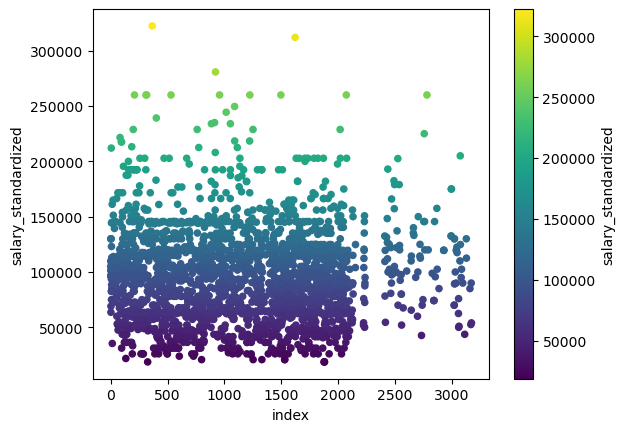

In [38]:
ax2 = dfc.plot.scatter(x='index',
                     y='salary_standardized',
                     c='salary_standardized',
                     colormap='viridis')

### Box plot of the salaries
#### There are outliers on the upper section of the box plot.

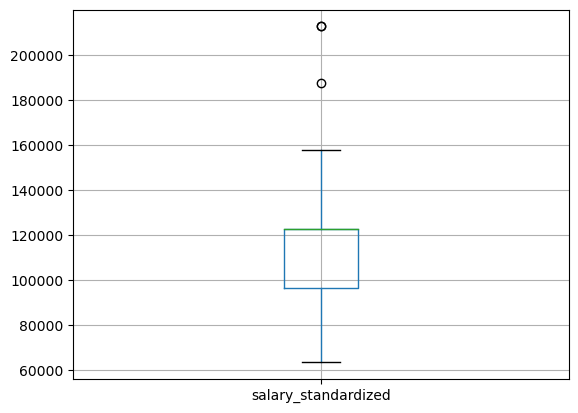

In [263]:
boxplot = dfc.boxplot(column=['salary_standardized']) 

# Average Salaries of Job Titles

In [39]:
df_temp = dfc.groupby(["title_key"]) \
       .agg({'salary_standardized':'mean'}) \
       .reset_index() \
       .rename(columns={'salary_standardized': 'Average Salary','title_key':'title'}) \
       .sort_values("Average Salary",ascending = False)

fig = px.bar(df_temp, x = 'title',   y = 'Average Salary' , color = "title", title = "Job Titles")
fig.show()

## Top 20 Highest Salary Job

In [41]:
dfc[["title","salary_standardized","title_key","rank_type"]].sort_values("salary_standardized",ascending=False).reset_index(drop=True).head(20)

,title,salary_standardized,title_key,rank_type
0,Data Analyst for Ecommerce and Marketing Agency,322400.0,Data Analyst,Mid-level
1,Analyze census data,312000.0,Data Analyst,Mid-level
2,Data Analyst,280800.0,Data Analyst,Mid-level
3,Tableau prep/Data analyst expert,260000.0,Data Analyst,Senior
4,Principal Data Engineer/Architect,260000.0,Data Engineer,Director
5,Data Analysis,260000.0,Data Analyst,Mid-level
6,"PLS, ensamble models, decision tree algorithms",260000.0,MLE,Mid-level
7,Senior Data Analyst,260000.0,Data Analyst,Senior
8,Consultation on Data Analysis for Master's Thesis,260000.0,Data Analyst,Mid-level
9,Market research data analyst - Contract to Hire,260000.0,Data Analyst,Mid-level


## Percentage of jobs being remote

([<matplotlib.patches.Wedge at 0x224945f9580>,
 [Text(-0.1648857196148244, 1.1381180516392408, 'False'),
  Text(0.17205466394590385, -1.187601445188773, 'True')],
 [Text(-0.09319627630403118, 0.6432841161439187, '54.6%'),
  Text(0.10036522063511058, -0.6927675096934509, '45.4%')])

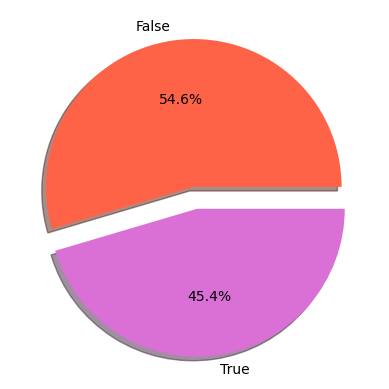

In [45]:
# null values in the column has been replaced with'false' value in order not to face an issue.
df["work_from_home"] = df["work_from_home"].fillna("False") 

df_temp =  df.groupby(["work_from_home"]) \
       .agg({'index':'count'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','work_from_home':'Remote Option'}) \
       .sort_values("Total Count",ascending = False)
explode = (0.05, 0.1)
colors=['tomato', 'orchid']
df_temp
#plot = df_temp.head(5).plot(kind='pie', y='Total Count', autopct='%1.0f%%', shadow=True,explode=explode)
plt.pie(df_temp["Total Count"], labels = df_temp["Remote Option"],autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)

## Checking if being remote affects the salaries
#### It seems there is no correlation between.

In [46]:
dfc["work_from_home"] = dfc["work_from_home"].fillna("False")
df_temp = dfc.groupby(["work_from_home"]) \
       .agg({'salary_standardized':'mean'}) \
       .reset_index() \
       .rename(columns={'salary_standardized': 'Average Salary','work_from_home':'Remote'}) \
       .sort_values("Average Salary",ascending = False)

fig = px.bar(df_temp, x = 'Remote',   y = 'Average Salary' , color = "Remote", title = "Remote")
fig.show()

C:\Users\ierem\AppData\Local\Temp\ipykernel_185268\80108547.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Which states have the most job postings?
#### Let's drop null and non specific values.

In [47]:
df=df_backup

df = df.dropna(subset = ['location'])
df = df.drop(df.loc[df['location'].str.contains('United States|Anywhere')].index)

#### Creating a 'State' column to see the locations of the jobs.

In [49]:
df['State'] = df['location'].str.split(', ').str[1]

dfr = df.groupby(["State"]) \
       .agg({'index':'count','salary_standardized':'mean'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','salary_standardized':'Average Salary'}) \
       .sort_values("Total Count",ascending = False).reset_index(drop=True)
dfr.index = dfr.index + 1

dfr.head()

,State,Total Count,Average Salary
1,MO,1878,110471.232919
2,OK,922,94016.125967
3,KS,828,92657.889862
4,AR,590,93992.941176
5,CA,114,112115.590909
6,TX,34,138516.000000


### Is there a correlation between total number of demanded skills and average salary & total number of jobs?

##### It seems there is no particular correlation between but when the number of demanded skills is increasing, total number of job postings seems decreased.

In [52]:
df['token_count'] = df['description_tokens'].apply(lambda n: len(n.split()))

In [54]:
dfa = df.groupby(["token_count"]) \
       .agg({'index':'count','salary_standardized':'mean'}) \
       .reset_index() \
       .rename(columns={'index': 'Total Count','salary_standardized':'Average Salary'}) \
       .sort_values("Average Salary",ascending = False).reset_index(drop=True)
dfa.index = dfa.index + 1

corr = dfa.corr()
pd.DataFrame(corr).style.background_gradient(cmap='coolwarm')

,token_count,Total Count,Average Salary
token_count,1.000000,-0.833929,0.365063
Total Count,-0.833929,1.000000,0.015710
Average Salary,0.365063,0.015710,1.000000


# What are the most posted jobs?

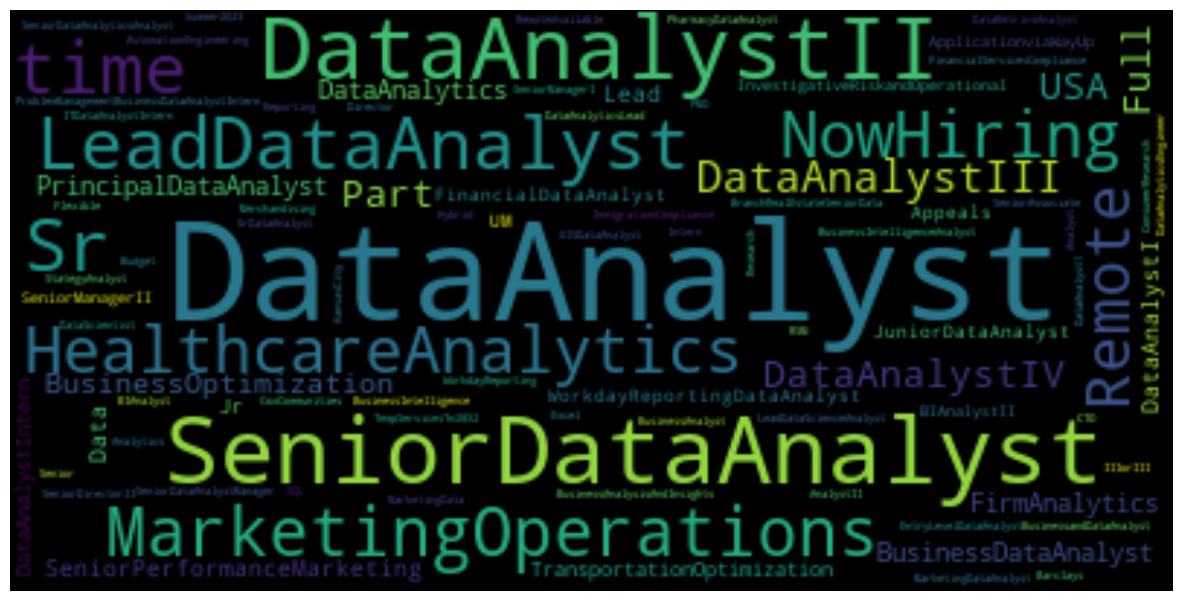

In [75]:
df0 = df
df0["title"] = df0["title"].str.replace(" ","")
text = " ".join(i for i in df0.title)
stopwords = set(STOPWORDS)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(collocations=False).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# What are the most demanded skills?

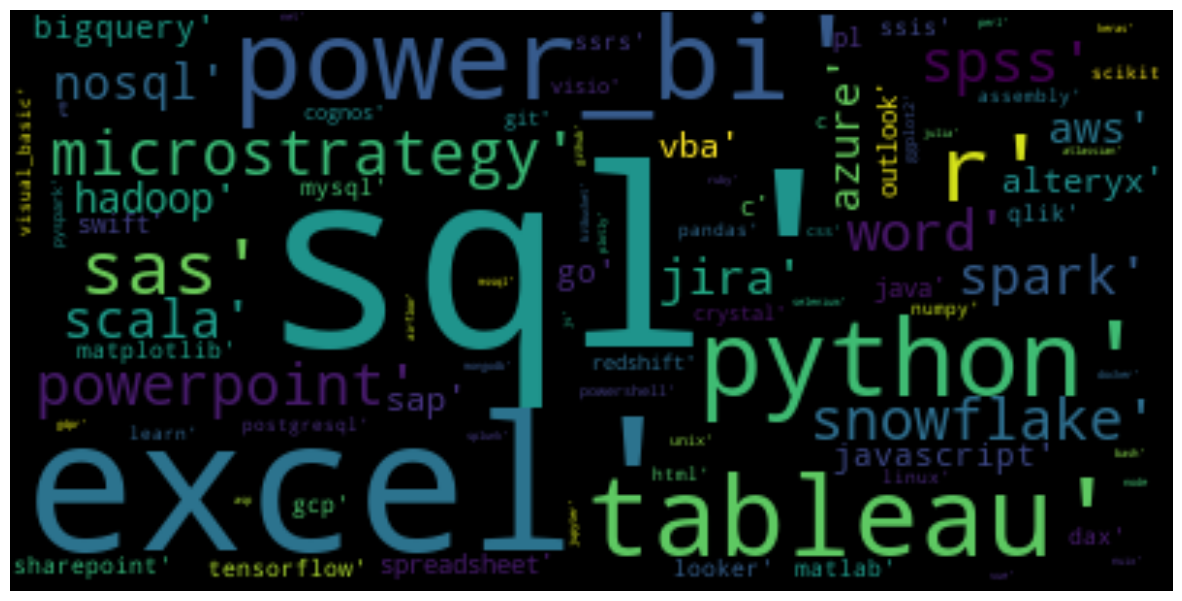

In [77]:
df0 = df
#df0["description_tokens"] = df0["description_tokens"].str.replace(" ","")
text = " ".join(i for i in df0.description_tokens)
stopwords = set(STOPWORDS)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(collocations=False).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Skill influence on the salaries

In [87]:
df = df_backup
df['SQL'] = np.where(df['description_tokens'].str.lower().str.contains("sql"), "Yes", "No")
df['NoSQL'] = np.where(df['description_tokens'].str.lower().str.contains("nosql"), "Yes", "No")
df['Spark'] = np.where(df['description_tokens'].str.lower().str.contains("spark"), "Yes", "No")
df['Python'] = np.where(df['description_tokens'].str.lower().str.contains("python"), "Yes", "No")
df['R'] = np.where(df['description_tokens'].str.lower().str.contains("'r'"), "Yes", "No")
df['BigQuery'] = np.where(df['description_tokens'].str.lower().str.contains("big"), "Yes", "No")
df['PowerBI'] = np.where(df['description_tokens'].str.lower().str.contains("power"), "Yes", "No")
df['Tableau'] = np.where(df['description_tokens'].str.lower().str.contains("tableau"), "Yes", "No")
df['Hadoop'] = np.where(df['description_tokens'].str.lower().str.contains("hadoop"), "Yes", "No")
df['Snowflake'] = np.where(df['description_tokens'].str.lower().str.contains("snowflake"), "Yes", "No")
df['Spark'] = np.where(df['description_tokens'].str.lower().str.contains("spark"), "Yes", "No")
df['Sas'] = np.where(df['description_tokens'].str.lower().str.contains("sas"), "Yes", "No")
df['Azure'] = np.where(df['description_tokens'].str.lower().str.contains("azure"), "Yes", "No")
df['Excel'] = np.where(df['description_tokens'].str.lower().str.contains("excel"), "Yes", "No")
df['Looker'] = np.where(df['description_tokens'].str.lower().str.contains("looker"), "Yes", "No")
df['Spss'] = np.where(df['description_tokens'].str.lower().str.contains("spss"), "Yes", "No")
df['Scala'] = np.where(df['description_tokens'].str.lower().str.contains("scala"), "Yes", "No")
df['Aws'] = np.where(df['description_tokens'].str.lower().str.contains("aws"), "Yes", "No")
df['Alteryx'] = np.where(df['description_tokens'].str.lower().str.contains("alteryx"), "Yes", "No")
df['Html'] = np.where(df['description_tokens'].str.lower().str.contains("html"), "Yes", "No")
df['JavaScript'] = np.where(df['description_tokens'].str.lower().str.contains("javascript"), "Yes", "No")
df['Qlik'] = np.where(df['description_tokens'].str.lower().str.contains("qlik"), "Yes", "No")
df['Matlab'] = np.where(df['description_tokens'].str.lower().str.contains("matlab"), "Yes", "No")
df['Jira'] = np.where(df['description_tokens'].str.lower().str.contains("jira"), "Yes", "No")
df['Tensorflow'] = np.where(df['description_tokens'].str.lower().str.contains("tensorflow"), "Yes", "No")
df['VBA'] = np.where(df['description_tokens'].str.lower().str.contains("vba"), "Yes", "No")
df['Swift'] = np.where(df['description_tokens'].str.lower().str.contains("swift"), "Yes", "No")
df_c = df

## Top salaries based on skills

In [88]:
df_b = df
i = 25
dicts = {}


for i in range(len(df.columns)):
    df = df_b
    subset = df.columns[i]
    df = df.drop(df[df[subset] == "No"].index)
    value = df.loc[:, 'salary_standardized'].mean()
    dicts[df.columns[i]] = value


dicts    
dfr = pd.DataFrame(dicts.items(), columns=['Key', 'Avg_Salary'])
dfr = dfr.iloc[25:].reset_index(drop=True)
dfr = dfr.sort_values("Avg_Salary", ascending=False)

dfr

,Key,Avg_Salary
18,Scala,131440.000000
5,Spark,130807.935135
11,Hadoop,119051.944898
4,NoSQL,118992.442105
12,Snowflake,114325.415730
19,Aws,113036.450000
16,Looker,111188.947674
14,Azure,110494.646753
23,Qlik,107563.777778
6,Python,105044.390717


In [89]:
fig = px.bar(dfr, x = 'Key',   y = 'Avg_Salary' , color = "Key", title = "Skill and Salary")
fig.show()

## Total number of job posts require that skill

In [84]:
for i in range(len(df.columns)):
    df = df_backup
    df = df.drop(df.loc[df['SQL']=="No"].index)
    value = df.loc[:, 'salary_standardized'].mean()
    dicts[df.columns[i]] = value

In [90]:
dicts = {}


for i in range(25,len(df.columns)):
    df = df_c
    subset = df.columns[i]
    df = df.drop(df[df[subset] == "No"].index)
    value = df.loc[:, 'index'].count()
    dicts[df.columns[i]] = value


dicts    
dfr = pd.DataFrame(dicts.items(), columns=['Key', 'Total_Count'])

dfr = dfr.sort_values("Total_Count", ascending=False)
dfr = dfr.iloc[3:].reset_index(drop=True)

dfr

,Key,Total_Count
0,SQL,7722
1,Excel,5204
2,PowerBI,4491
3,Tableau,4074
4,Python,4055
5,R,2675
6,Sas,1474
7,Snowflake,1001
8,Aws,860
9,Azure,774


In [92]:
fig = px.bar(dfr, x = 'Key',   y = 'Total_Count' , color = "Key", title = "Skill and Total Number of Job Posts")
fig.show()

## Influence of having that skill

In [96]:
df = df_b

i = 29
dic = {}
df = df.iloc[26:].reset_index(drop=True)
#subset = df.columns[i]

for i in range(25,len(df.columns)):
    df = df_b
    #df = df.iloc[25:].reset_index(drop=True)
    subset = df.columns[i]
    
    df_tab = df.groupby([subset]) \
    .agg({'salary_standardized':'mean'}) \
    .reset_index() \
    .rename(columns={'salary_standardized':'Average Salary'}) \
    
    
    value = 100*(1-(df_tab.iloc[0,1] / df_tab.iloc[1,1]))
    
    dic[df.columns[i]] = value

dic
dfr = pd.DataFrame(dic.items(), columns=['Key', 'Difference']).sort_values("Difference",ascending=False).reset_index(drop=True)
dfr.index = dfr.index + 1
dfr.head(24)

,Key,Difference
1,Scala,26.430430
2,Spark,26.235657
3,Hadoop,18.900313
4,NoSQL,18.781929
5,Snowflake,16.252566
6,Aws,14.926333
7,Looker,13.218226
8,Azure,12.609685
9,Qlik,10.062491
10,Python,9.614303


## Most demanded skills by the job titles

In [115]:
df = df_backup

df.description_tokens = df.description_tokens.str.strip('[]').str.split(r'\s*,\s*')
df = df.drop(df.loc[df['description_tokens']==''].index)

result = df.explode('description_tokens').rename(columns={'description_tokens': 'token'}) #iterating to the rows
result = result.drop(result.loc[df['description_tokens']==''].index) #dropping empty values

In [117]:
dfy1 = result.groupby(['title_key'])['token'].agg(lambda x:x.value_counts().index[0])\
     .rename_axis('token').to_frame('counts').reset_index()
dfy2 = result.groupby(['title_key'])['token'].agg(lambda x:x.value_counts().index[1])\
     .rename_axis('token').to_frame('counts').reset_index()
dfy3 = result.groupby(['title_key'])['token'].agg(lambda x:x.value_counts().index[2])\
     .rename_axis('token').to_frame('counts').reset_index()

dfy = pd.merge(dfy1, dfy2, how = "inner", on = 'token')
dfy = pd.merge(dfy, dfy3, how = "inner", on = 'token')
dfy = dfy.rename(columns={"token": "Job Title", "counts_x": "Most Demanded", "counts_y": "2nd_Demanded", "counts": "3rd_Demanded"})

cols=["Most Demanded","2nd_Most_Demanded","3rd_Most_Demanded"]

dfy["Most Demanded"] = dfy["Most Demanded"].replace("'","")
dfy = dfy.head(10)
dfy



,Job Title,Most Demanded,2nd_Demanded,3rd_Demanded
0,Business Analyst,'sql','excel','power_bi'
1,Business Intelligence Analyst,'sql','tableau','power_bi'
2,Data Analyst,'sql','excel','tableau'
3,Data Analytics Engineer,'sql','tableau','python'
4,Data Engineer,'python','sql','aws'
5,Data Governance Analyst,'sql',,'excel'
6,Data Management Analyst,'sql','excel','word'
7,Data Quality Analyst,'sql','excel','tableau'
8,Data Scientist,'python','sql','r'
9,Data Warehouse Engineer,'sql','tableau','power_bi'
